In [ ]:
import numpy as np
import pandas as pd

# Prepare dummy returns data with same mean and different volatility

In [ ]:
asset_return1 = [0.05, 0.3, -0.1, 0.35, 0.2]
asset_return2 = [0.5, -0.2, 0.3, 0.5, -0.3]

In [ ]:
print(np.mean(asset_return1))
print(np.mean(asset_return2))
print(np.mean(asset_return1) == np.mean(asset_return2))

0.16
0.16
True


In [ ]:
return_df = pd.DataFrame({"Asset1":asset_return1, "Asset2":asset_return2})
return_df

,Asset1,Asset2
0,0.05,0.5
1,0.30,-0.2
2,-0.10,0.3
3,0.35,0.5
4,0.20,-0.3


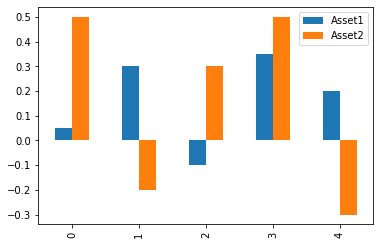

In [ ]:
return_df.plot.bar()

In [ ]:
return_df.std()

Asset1    0.185068
Asset2    0.384708
dtype: float64

In [ ]:
return_df.mean()

Asset1    0.16
Asset2    0.16
dtype: float64

In [ ]:
return_df + 1

,Asset1,Asset2
0,1.05,1.5
1,1.30,0.8
2,0.90,1.3
3,1.35,1.5
4,1.20,0.7


In [ ]:
init_investment = 100
cum_value = (return_df + 1).cumprod()*100
cum_value

,Asset1,Asset2
0,105.0000,150.0
1,136.5000,120.0
2,122.8500,156.0
3,165.8475,234.0
4,199.0170,163.8


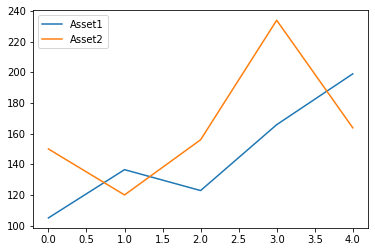

In [ ]:
cum_value.plot.line()

# From prices to returns

In [ ]:
prices = [0.1, 0.2, -0.05]

In [ ]:
# first period return
prices[1]/prices[0] - 1

1.0

In [ ]:
# second period return
prices[2]/prices[1] - 1

-1.25

In [ ]:
# calculate sequence of returns - approach one using numpy
print(prices[1:])
print(prices[:-1])
print(np.array(prices[1:])/np.array(prices[:-1])-1)

[0.2, -0.05]
[0.1, 0.2]
[ 1.   -1.25]


In [ ]:
# calculate sequence of returns - approach two using pandas
prices_df = pd.DataFrame({"price":prices})
prices_df

,price
0,0.10
1,0.20
2,-0.05


In [ ]:
prices_df.iloc[1:]

,price
1,0.20
2,-0.05


In [ ]:
prices_df.iloc[:-1]

,price
0,0.1
1,0.2


In [ ]:
# misaligned due to indexing
prices_df.iloc[1:]/prices_df.iloc[:-1]

,price
0,NaN
1,1.0
2,NaN


In [ ]:
# remove indexing by accesing the values attribute
prices_df.iloc[1:].values/prices_df.iloc[:-1] - 1

,price
0,1.00
1,-1.25


In [ ]:
# only need to access the values of one 
prices_df.iloc[1:]/prices_df.iloc[:-1].values - 1

,price
1,1.00
2,-1.25


In [ ]:
# approach three - using the shift function 
prices_df.shift(1)

,price
0,NaN
1,0.1
2,0.2


In [ ]:
# no return on the first day
prices_df/prices_df.shift(1) - 1

,price
0,NaN
1,1.00
2,-1.25


In [ ]:
# approach four - using the pct_change function
returns_df = prices_df.pct_change()
returns_df

,price
0,NaN
1,1.00
2,-1.25


In [ ]:
# calculate compounded terminal
# first obtain the 1+R formatted returns for each single period
returns_df + 1 

,price
0,NaN
1,2.00
2,-0.25


In [ ]:
# approach one - numpy
# get the compounded return by multplying all previous single period returns and minus one
np.prod(returns_df + 1) - 1

price   -1.5
dtype: float64

In [ ]:
# approach two - pandas
(returns_df+1).prod() - 1

price   -1.5
dtype: float64

# Annualization

In [ ]:
# daily return, assuming 252 trading days
r = 0.0001
(1+r)**252-1

0.025518911987694626

In [ ]:
# monthly return
r = 0.01
(1+r)**12-1

0.12682503013196977

In [ ]:
# quarterly return
r = 0.05
(1+r)**4-1

0.21550625000000023

In [ ]:
# annualize the risk/volatility/std for daily volatility
0.001*np.sqrt(252)

0.015874507866387545

# Sharpe ratio

## Simple example

In [ ]:
p1_ret = 0.05
p1_vol = 0.2
p2_ret = 0.1
p2_vol = 0.5
risk_free_rate = 0.03

In [ ]:
p1_ret / p1_vol

0.25

In [ ]:
p2_ret / p2_vol

0.2

In [ ]:
(p1_ret - risk_free_rate) / p1_vol

0.10000000000000002

In [ ]:
(p2_ret - risk_free_rate) / p2_vol

0.14

## Working with real data

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 5.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import yfinance as yf
prices_df = yf.download(["AAPL","GOOG"], start="2023-01-01")
prices_df.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close             \
                                 AAPL       GOOG        AAPL       GOOG   
Date                                                                      
2023-01-03 00:00:00-05:00  125.070000  89.699997  125.070000  89.699997   
2023-01-04 00:00:00-05:00  126.360001  88.709999  126.360001  88.709999   
2023-01-05 00:00:00-05:00  125.019997  86.769997  125.019997  86.769997   
2023-01-06 00:00:00-05:00  129.619995  88.160004  129.619995  88.160004   
2023-01-09 00:00:00-05:00  130.149994  88.800003  130.149994  88.800003   

                                 High                    Low             \
                                 AAPL       GOOG        AAPL       GOOG   
Date                                                                      
2023-01-03 00:00:00-05:00  130.899994  91.550003  124.169998  89.019997   
2023-01-04 00:00:00-05:00  128.660004  91.239998  125.080002  87.800003   
2023-01-05 00:00:00-05:00  127.769997  88.209999  124.760002  86.559998   
2023-01-06 00:00:00-05:00  130.289993  88.470001  124.889999  85.570000   
2023-01-09 00:00:00-05:00  133.410004  90.830002  129.889999  88.580002   

                                 Open                Volume            
                                 AAPL       GOOG       AAPL      GOOG  
Date                                                                   
2023-01-03 00:00:00-05:00  130.279999  89.830002  112117500  20738500  
2023-01-04 00:00:00-05:00  126.889999  91.010002   89113600  27046500  
2023-01-05 00:00:00-05:00  127.129997  88.070000   80962700  23136100  
2023-01-06 00:00:00-05:00  126.010002  87.360001   87686600  26604400  
2023-01-09 00:00:00-05:00  130.470001  89.195000   70790800  22996700

In [ ]:
# convert datetime index to date format
prices_df.index = prices_df.index.date
# keep the adjust close
prices_df = prices_df['Adj Close']
prices_df.head()

,AAPL,GOOG
2023-01-03,125.070000,89.699997
2023-01-04,126.360001,88.709999
2023-01-05,125.019997,86.769997
2023-01-06,129.619995,88.160004
2023-01-09,130.149994,88.800003


In [ ]:
returns_df = prices_df.pct_change()
returns_df.head()

,AAPL,GOOG
2023-01-03,NaN,NaN
2023-01-04,0.010314,-0.011037
2023-01-05,-0.010605,-0.021869
2023-01-06,0.036794,0.016019
2023-01-09,0.004089,0.007260


In [ ]:
# drop na
returns_df = returns_df.dropna()
returns_df.head()

,AAPL,GOOG
2023-01-04,0.010314,-0.011037
2023-01-05,-0.010605,-0.021869
2023-01-06,0.036794,0.016019
2023-01-09,0.004089,0.007260
2023-01-10,0.004456,0.004955


## Mean, variance and standard deviation of returns

In [ ]:
# asset return using arithmetic mean
returns_df.mean()

AAPL    0.008900
GOOG    0.006515
dtype: float64

In [ ]:
# column-wise std
returns_df.std(axis=0)

AAPL    0.012275
GOOG    0.022220
dtype: float64

In [ ]:
# row-wise std - not needed
returns_df.std(axis=1)

2023-01-04    0.015097
2023-01-05    0.007965
2023-01-06    0.014690
2023-01-09    0.002242
2023-01-10    0.000352
2023-01-11    0.009001
2023-01-12    0.002259
2023-01-13    0.000308
2023-01-17    0.011068
2023-01-18    0.000882
2023-01-19    0.016097
2023-01-20    0.026843
2023-01-23    0.002871
2023-01-24    0.021089
2023-01-25    0.014352
2023-01-26    0.007296
dtype: float64

In [ ]:
# calculate volatility manually
# step 1: de-mean
deviations_df = returns_df - returns_df.mean()
deviations_df.head()

,AAPL,GOOG
2023-01-04,0.001414,-0.017551
2023-01-05,-0.019505,-0.028384
2023-01-06,0.027894,0.009505
2023-01-09,-0.004811,0.000745
2023-01-10,-0.004443,-0.001560


In [ ]:
# step 2: square the deviations
squared_deviations_df = deviations_df**2
squared_deviations_df.head()

,AAPL,GOOG
2023-01-04,0.000002,3.080481e-04
2023-01-05,0.000380,8.056272e-04
2023-01-06,0.000778,9.034331e-05
2023-01-09,0.000023,5.550067e-07
2023-01-10,0.000020,2.432467e-06


In [ ]:
# step 3: calculate average squared deviations, i.e., variance
variance = squared_deviations_df.mean()
variance

AAPL    0.000141
GOOG    0.000463
dtype: float64

In [ ]:
# step 4: take square root to get standard deviation/volatility
# result is differnt from std() which devides the sum by n-1 instead of n here
volatility = np.sqrt(variance)
volatility

AAPL    0.011886
GOOG    0.021514
dtype: float64

In [ ]:
# adjust from step 3 onwards
num_rows = squared_deviations_df.shape[0]
variance2 = squared_deviations_df.sum() / (num_rows-1)
variance2

AAPL    0.000151
GOOG    0.000494
dtype: float64

In [ ]:
volatility2 = np.sqrt(variance2)
volatility2

AAPL    0.012275
GOOG    0.022220
dtype: float64

## Annualizing volatility

In [ ]:
# the returns are daily, so we multiply by square root of 252
annualized_vol = returns_df.std()*np.sqrt(252)
annualized_vol

AAPL    0.194867
GOOG    0.352725
dtype: float64

In [ ]:
# another way to do square root
annualized_vol = returns_df.std()*(252**0.5)
annualized_vol

AAPL    0.194867
GOOG    0.352725
dtype: float64

## Annualizing returns

In [ ]:
# average daily return as geometric mean
returns_per_day = (returns_df+1).prod()**(1/returns_df.shape[0]) - 1
returns_per_day

AAPL    0.008830
GOOG    0.006286
dtype: float64

In [ ]:
# calculate annualized return
annualized_return = (returns_per_day+1)**252-1
annualized_return

AAPL    8.16531
GOOG    3.85087
dtype: float64

In [ ]:
# another shorthand approach
annualized_return = (returns_df+1).prod()**(252/returns_df.shape[0])-1
annualized_return

AAPL    8.16531
GOOG    3.85087
dtype: float64

## Computing Sharpe ratio

In [ ]:
# assume a constant risk free rate
riskfree_rate = 0.03

In [ ]:
excess_return = annualized_return - riskfree_rate

In [ ]:
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

AAPL    41.748043
GOOG    10.832426
dtype: float64